Most up to date top_offender approach, level 2

In [312]:
# %load_ext autoreload
# %reload_ext autoreload
# %autoreload 2

In [313]:
import os
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')
# os.chdir('C:\\Users\\gratten\\Documents\\python\\projects\\data_cleanse')

import pandas as pd
from prep import filter
from prep import sort
from plot import bar
from utility import generate

In [314]:
fileName = 'filelist_7_15'
df_og = pd.read_csv('datasets/' + fileName + '.csv', sep=';')

In [315]:
df = filter.sld(df_og)

In [316]:
dups = df[df.duplicated(['name_low'], keep=False)]
dups = dups.sort_values(['name_low'])

In [317]:
dups = dups.reset_index()

In [318]:
dups.head()

,index,Name,Format,size,modified,created,path,name_low
0,199469,#40 CHAIN.SLDASM,SLDASM,"98,273",10/12/2018 13:43:23,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 chain.sldasm
1,13308,#40 Chain.SLDASM,SLDASM,"92,370",06/19/2020 16:04:50,02/21/2016 22:51:10,R:\Doc\SolidWorks\CONVEYOR,#40 chain.sldasm
2,199473,#40 PIN RIVETED.SLDPRT,SLDPRT,"55,996",02/24/2017 15:31:59,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 pin riveted.sldprt
3,46813,#40 PIN RIVETED.SLDPRT,SLDPRT,"52,842",11/20/2014 10:11:00,02/21/2016 23:05:11,R:\Doc\SolidWorks\HS4989 - QUAKER MAID MEATS,#40 pin riveted.sldprt
4,33754,#40 PIN RIVETEDRev2.SLDPRT,SLDPRT,"52,722",11/19/2014 22:34:28,02/21/2016 22:59:28,R:\Doc\SolidWorks\HS4836-4 TWO FLAP CLOSER (ME...,#40 pin rivetedrev2.sldprt


In [319]:
top_offenders = dups['path'].value_counts().index.to_list()

In [320]:
# choose offending directory
num = 0

print(top_offenders[num])

R:\Doc\SolidWorks\HS4937, CELOX


In [321]:
file_list = []
for i in range(len(dups['path'])):
    if dups['path'][i] == top_offenders[num]:
        file_list.append(dups['name_low'].iloc[i])

In [322]:
# unique file names in chosen directory
len(file_list)

332

In [323]:
# dictionary of all files in chosen directory and their associated paths
# {filename: [path1, path2, etc], filename: [path1, path2, etc]}
file_paths = {}
for file in file_list:
    dups_trimmed = dups[(dups['name_low'] == file)]
    path_list = []
    for path in dups_trimmed['path']:
        path_list.append(path)
    file_paths[file] = path_list

In [324]:
len(file_paths.keys())

332

In [325]:
# num2 = 2

# keys = []
# values = []
# for k, v in file_paths.items():
#     if len(v) == num2:
#         keys.append(k)
#         values.append(v)

In [326]:
partner_paths = []
for k, v in file_paths.items():
    for i in v:
        if i != top_offenders[num]:
            partner_paths.append(i)
#         print(i)
#     print()
#     print()

In [327]:
len(partner_paths)

1251

In [328]:
partner_paths_series = pd.Series(partner_paths)

In [329]:
partner_paths_series.value_counts()

R:\Doc\SolidWorks\Celox feeders\Study 3, Mid-range\9in Celox feeder                           117
R:\Doc\SolidWorks\HS4975 Nestle Gaffney Celox 9H\9in Celox feeder for Decatur 25 july 2008    114
R:\Doc\SolidWorks\P6153 CELOX AP\JUNK                                                         111
R:\Doc\SolidWorks\HS4973 Kraft Tech Center (Celox)\15 INCH FEEDER                             102
R:\Doc\SolidWorks\P6144 SFR USA                                                                71
                                                                                             ... 
R:\Doc\SolidWorks\K23626 Bosch Packaging VR                                                     1
R:\Doc\SolidWorks\SolidWorks Palette\Palette Parts\BIN-Bearing Inserts                          1
R:\Doc\SolidWorks\Compak II\Kliklok\celkova zostava                                             1
R:\Doc\SolidWorks\SolidWorks Palette\Palette Parts\Belts and Chains                             1
R:\Doc\SolidWorks\HS

In [330]:
top_offenders2 = partner_paths_series.value_counts().index.to_list()

In [331]:
len(top_offenders2)

189

In [332]:
valCounts = partner_paths_series.value_counts()

In [333]:
valCounts[0]

117

In [334]:
for i in range(len(valCounts)):
    if valCounts[i] > 10:
        print(valCounts[i])

117
114
111
102
71
40
35
34
29
27
24
23
22
22
20
19
15
13
12
12
11
11


In [335]:
# Directory A
A = top_offenders[num]
A

'R:\\Doc\\SolidWorks\\HS4937, CELOX'

In [336]:
# Define directory B
num2 = 0

B = top_offenders2[num2]
B

'R:\\Doc\\SolidWorks\\Celox feeders\\Study 3, Mid-range\\9in Celox feeder'

In [337]:
x = top_offenders2[num2]

file_paths_trimmed = {}
for k, v in file_paths.items():
    if x in v:
        file_paths_trimmed[k] = v

In [338]:
x

'R:\\Doc\\SolidWorks\\Celox feeders\\Study 3, Mid-range\\9in Celox feeder'

In [339]:
totalFiles = len(file_paths_trimmed.keys())

In [340]:
# for k, v in file_paths_trimmed.items():
#     print(k, len(v))

In [341]:
occur_list = []
for k, v in file_paths_trimmed.items():
    if len(v) not in occur_list:
            occur_list.append(len(v))

In [342]:
occur_list

[6, 8, 5, 7, 3, 4, 2, 13, 20, 21, 28, 12, 9, 10]

In [343]:
occur_dict = {}
for i in occur_list:
    occur_dict[i] = 0
    for v in file_paths_trimmed.values():
        if i == len(v):
            occur_dict[i] += 1

In [344]:
num_list = []
occur_list = []
for i in range(len(occur_dict)):
    key = min(occur_dict.keys())
    num_list.append(key)
    value = occur_dict.pop(key)
    occur_list.append(value) 

In [345]:
num_list

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 20, 21, 28]

In [346]:
occur_list

[4, 7, 33, 22, 22, 5, 12, 3, 1, 1, 3, 2, 1, 1]

In [347]:
def chart_em(num_list, occur_list):
    
    df = pd.DataFrame({'other paths':num_list, 'occurences':occur_list})
    title = f'{A}\n{B}\nTotal Files: {totalFiles}'
    ax = df.plot.bar(x='other paths', y='occurences', rot=0, figsize=(10, 5), title = title)

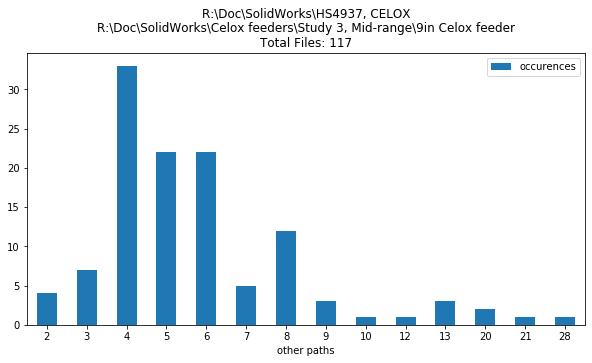

In [348]:
chart_em(num_list, occur_list)

In [358]:
x = 4

file_paths_trimmed_trimmed = {}
for k, v in file_paths_trimmed.items():
    if len(v) == x:
        file_paths_trimmed_trimmed[k] = v

In [359]:
# for k, v in file_paths_trimmed_trimmed.items():
#     print(v[0])
#     print(v[1])
#     print(v[2])
#     print(v[3])
#     print()

In [360]:
test_path_list = []
for k, v in file_paths_trimmed_trimmed.items():
    for i in v:
        test_path_list.append(i)

In [361]:
len(test_path_list)

132

In [362]:
test_path_list = pd.Series(test_path_list)

In [363]:
file_list = test_path_list.value_counts().index.to_list()

In [364]:
occurence_list = test_path_list.value_counts().to_list()

In [365]:
def chart_em2(list1, list2):
    
    df = pd.DataFrame({'other paths':list1, 'occurences':list2})
#     title = f'{top_offenders[i]}\nTotal files: {totalFiles_list[i]}\n Chart {x}'
    ax = df.plot.barh(x='other paths', y='occurences', rot=0, figsize=(3, 7))

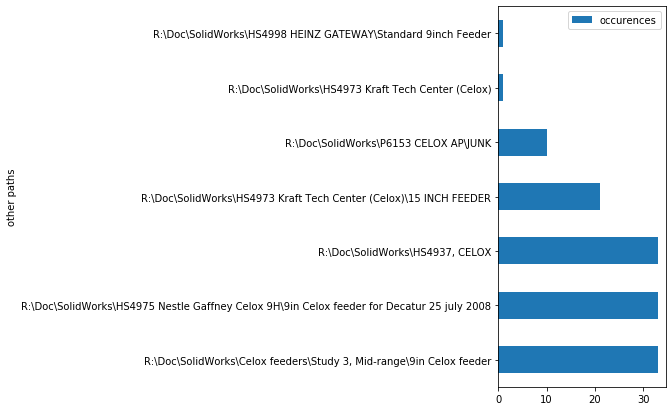

In [366]:
chart_em2(file_list, occurence_list)